In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
1920*4, 1080*4

(7680, 4320)

In [3]:
from __future__ import annotations
from dataclasses import dataclass, field, replace
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Any

In [ ]:
import RaTag.dataIO as dataIO 
from RaTag.datatypes import *
import RaTag.config as config
import RaTag.transport as transport
import RaTag.plotting as plotting
import RaTag.constructors as constructors
import RaTag.analysis as analysis
import RaTag.transformations as transf
from RaTag.xray_integration import *

In [5]:
base_dir = Path('/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec')

# Test x-rays module

In [5]:
file_ff = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN8_20250903_Gate500_Anode2400_P6_1Wfm.wfm'
wfm_ff = dataIO.load_wfm(file_ff)
wfm_ff.ff

True

In [ ]:
base_dir = Path('/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec')
meas_path = base_dir / 'FieldScan_Gate050_Anode1950'
# look into wfm 7319
wfm_paths = sorted(meas_path.glob('*.wfm'))
wfm_paths[:3]
i = 0
j = -1

In [7]:
t_s1 = -3.0
s2_start = 14


(10, 45)

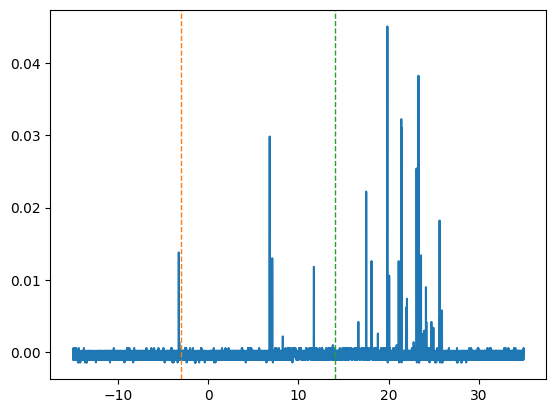

In [529]:
wf = dataIO.load_wfm(wfm_paths[i])
j += 1
Vi = wf.v[j, :]
wf.t *= 1e6  # to us
plt.plot(wf.t, Vi);
plt.axvline(t_s1, color='C1', ls='--', lw=1)
plt.axvline(s2_start, color='C2', ls='--', lw=1)
i, j

In [540]:
wff

Waveform(t=array([-1.50000e-05, -1.49998e-05, -1.49996e-05, ...,  3.49994e-05,
        3.49996e-05,  3.49998e-05]), v=array([[-0.0002, -0.0002, -0.0002, ...,  0.0002,  0.0002,  0.0002],
       [-0.0002, -0.0002, -0.0002, ...,  0.0002, -0.0002, -0.0002],
       [-0.0002, -0.0002, -0.0002, ..., -0.0006, -0.0006, -0.0006],
       ...,
       [-0.0006, -0.0006, -0.0006, ..., -0.001 , -0.001 , -0.001 ],
       [-0.001 , -0.0006, -0.0006, ..., -0.001 , -0.0006, -0.0006],
       [-0.0006, -0.0002, -0.0002, ..., -0.0002, -0.0002, -0.0002]]), source='/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate050_Anode1950/RUN8_20250902_Gate50_Anode1950_P1_1000Wfm.wfm', ff=True, nframes=48)

In [532]:
wff = dataIO.load_wfm(wfm_paths[0])
wfy = dataIO.extract_single_frame(wff, 40)
wfn = dataIO.extract_single_frame(wff, 42)

wfnn = dataIO.extract_single_frame(dataIO.load_wfm(wfm_paths[1]), 4)
wfyy = dataIO.extract_single_frame(dataIO.load_wfm(wfm_paths[5]), 10)

wfy3 = dataIO.extract_single_frame(dataIO.load_wfm(wfm_paths[10]), 45)
wfn3 = dataIO.extract_single_frame(dataIO.load_wfm(wfm_paths[2]), 18)


Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability


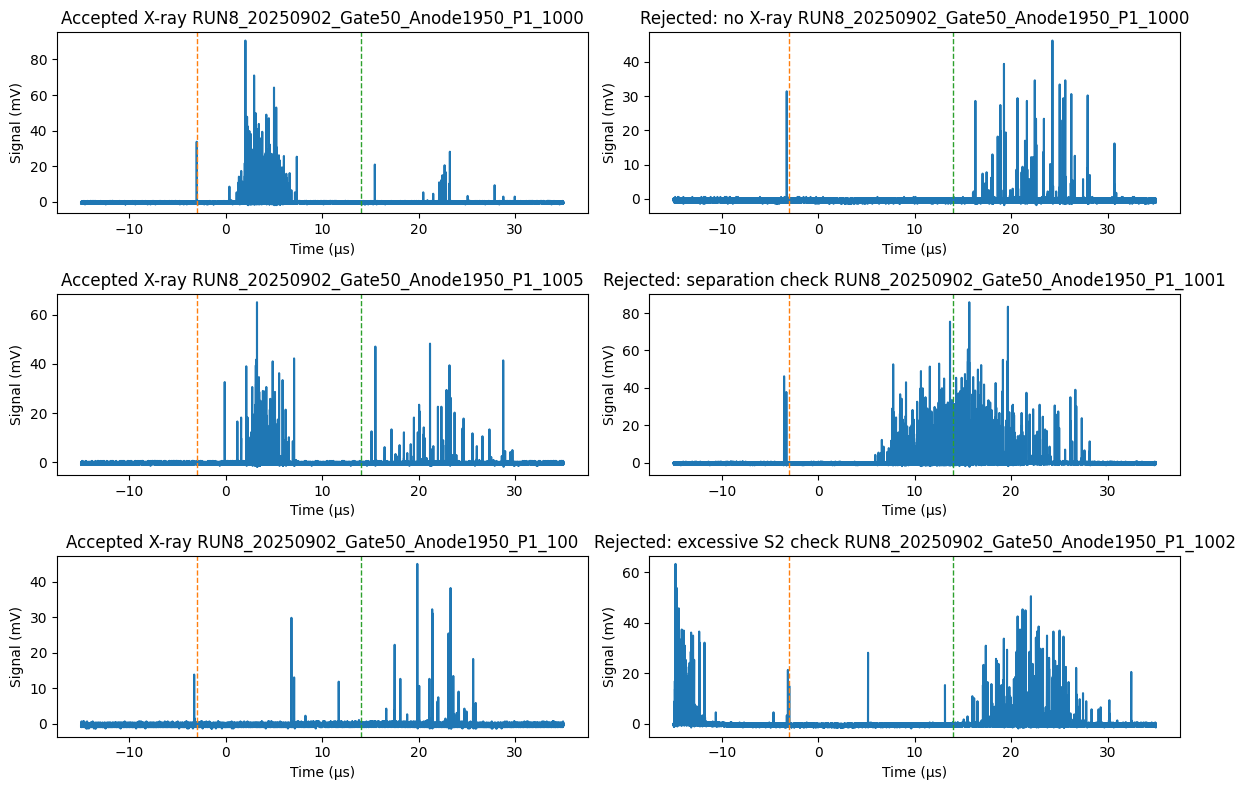

In [533]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8), )
plotting.plot_waveform(wfy, ax=ax[0,0], title='Accepted X-ray')
plotting.plot_waveform(wfn, ax=ax[0,1], title='Rejected: no X-ray')
plotting.plot_waveform(wfyy, ax=ax[1,0], title='Accepted X-ray')
plotting.plot_waveform(wfnn, ax=ax[1,1], title='Rejected: separation check')
plotting.plot_waveform(wfy3, ax=ax[2,0], title='Accepted X-ray')
plotting.plot_waveform(wfn3, ax=ax[2,1], title='Rejected: excessive S2 check')
for a in ax.flatten():
    a.axvline(t_s1, color='C1', ls='--', lw=1)
    a.axvline(s2_start, color='C2', ls='--', lw=1)
plt.tight_layout()

In [35]:
xres_test = xray_event_pipeline(wff, t_s1=t_s1, s2_start=s2_start, bs_threshold=2, max_area_s2=1e5,
                              dt = 2e-4, min_s2_sep=1, min_s1_sep=1)

# plotting.plot_waveform(pwf, title='Processed accepted X-ray')

# Test at set level

In [541]:
set_50 = constructors.set_from_dir(meas_path)

In [542]:
xres50 = classify_xrays_set(set_50, t_s1=t_s1, s2_start=s2_start, bs_threshold=2, max_area_s2=1e5,
                        min_s2_sep=1, min_s1_sep=1, dt=2e-4)

In [543]:
xareas = np.array([xr.area  for xff in xres50.events for xr in xff if xr.accepted])

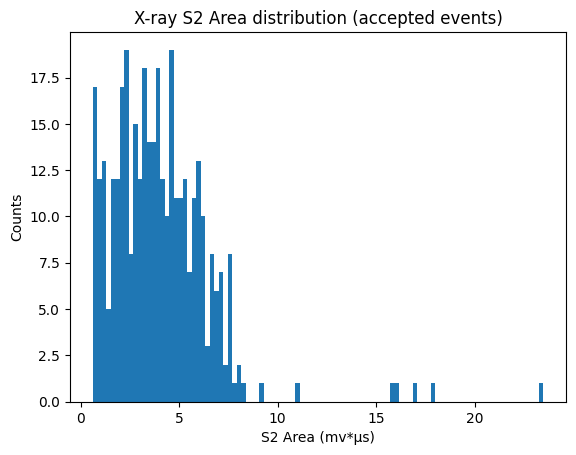

In [544]:
xcut = xareas[(xareas > 0.6) & (xareas < 30)]
plt.hist(xcut, bins=100);
plt.gca().set(xlabel='S2 Area (mv*µs)', ylabel='Counts', title='X-ray S2 Area distribution (accepted events)');

In [41]:
np.mean(xcut) * 1000 # / 23.6  # phe/keV


np.float64(4006.866871516058)

In [44]:
W = 22  # eV
A_s2_xr = np.mean(xcut)
E_gamma = 12.3 * 1000  # eV, from https://www.nndc.bnl.gov/nudat3/decaysearchdirect.jsp?nuc=232Th&unc=NDS
N_e = E_gamma / W # electrons
g_s2 = A_s2_xr / N_e  # mV·µs/electron
g_s2, N_e

(np.float64(0.00716675375393116), 559.0909090909091)

In [45]:
A_s2_ra = 1 # mV·µs
N_e_ra = A_s2_ra / g_s2
E_ra = N_e_ra * W / 1000  # keV
E_ra, N_e_ra

(np.float64(3.069730139385966), np.float64(139.53318815390756))

# Test at run level

In [545]:
run8 = Run(
    root_directory = base_dir,
    run_id = "RUN8",
    el_field = 2375,            # V/cm
    target_isotope = "Th228",
    pressure = 2.0,             # bar
    temperature = 297,          # K
    sampling_rate = 1e9,
    el_gap = 0.8,               # cm
    drift_gap = 1.4,            # cm

    width_s2 = 20                # µs 
)

run8 = constructors.populate_run(run8)
run8 = transport.with_gas_density(run8)

run8.gas_density

4.877421222922505e+19

In [546]:
def prepare_set(s: SetPmt, run: Run) -> SetPmt:
    s1 = constructors.estimate_s1_from_batches(s, n_batches=20, batch_size=20, flag_plot=False)
    s1 = constructors.set_fields(s1, drift_gap_cm=run.drift_gap, el_gap_cm=run.el_gap, gas_density=run.gas_density)
    s1 = constructors.set_transport_properties(s1, drift_gap_cm=run.drift_gap, transport=None)
    return s1

run8 = replace(run8, sets=[prepare_set(s, run8) for s in run8.sets])

In [548]:
for set in run8.sets:
    print(set.metadata['t_s1'])

-8.158
-6.596
-4.016
-3.698
-4.269
-6.556
-6.52


In [549]:
for set in run8.sets:
    if set.metadata['t_s1'] < -3.7:
        set.metadata['t_s1'] = -3.6

In [553]:
intconfig_xrays = config.IntegrationConfig(
    bs_threshold = 2,          # mV
    max_area_s2 = 1e5,        # mV·µs
    min_s2_sep = 1,            # µs
    min_s1_sep = 1,            # µs
    n_pedestal = 200,          # samples
    ma_window = 10,            # samples
    dt = 2e-4,                    # ns
)
range_sets = slice(1, 5)
sets_to_process = run8.sets[range_sets] if range_sets is not None else run8.sets
for i, set_pmt in enumerate(sets_to_process):
    print(f'{i}, {set_pmt.source_dir}, {set_pmt.metadata["t_s1"]}, {set_pmt.time_drift}')

0, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate100_Anode2000, -3.6, 15.137548167034852
1, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate200_Anode2100, -3.6, 13.209800817948338
2, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate300_Anode2200, -3.698, 12.430697144677039
3, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate400_Anode2300, -3.6, 11.834509826932996


In [554]:
results_run8 = classify_xrays_run(run8, ts2_tol = -0.2, range_sets=range_sets,
                                    config=intconfig_xrays)

Processing x-rays in set /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate100_Anode2000 in drift window: (-3.6, np.float64(11.337548167034853))
Processing x-rays in set /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate200_Anode2100 in drift window: (-3.6, np.float64(9.409800817948339))
Processing x-rays in set /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate300_Anode2200 in drift window: (np.float64(-3.698), np.float64(8.532697144677039))
Processing x-rays in set /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate400_Anode2300 in drift window: (-3.6, np.float64(8.034509826932997))


In [556]:
range_sets = slice(5, 7)
sets_to_process = run8.sets[range_sets] if range_sets is not None else run8.sets
for i, set_pmt in enumerate(sets_to_process):
    print(f'{i}, {set_pmt.source_dir}, {set_pmt.metadata["t_s1"]}, {set_pmt.time_drift}')

0, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate500_Anode2400, -3.6, 11.333863327602604
1, /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate600_Anode2500, -3.6, 10.90498318913292


In [557]:
results_run82 = classify_xrays_run(run8, ts2_tol = -0.2, range_sets=range_sets,
                                    config=intconfig_xrays)

Processing x-rays in set /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/FieldScan_Gate500_Anode2400 in drift window: (-3.6, np.float64(7.533863327602604))


PicklingError: Can't pickle <class 'RaTag.datatypes.XRayResults'>: it's not the same object as RaTag.datatypes.XRayResults

In [20]:
results_run5

{'FieldScan_5GSsec_Anode1950V_Gate50V': XRayResults(set_id=PosixPath('/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode1950V_Gate50V'), events=[XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_1245Wfm', accepted=False, reason='no signal above baseline', area=None), XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_1514Wfm', accepted=False, reason='insufficient separation (t_pre_s2=19.76), (t_post_s1=0.01)', area=None), XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_4659Wfm', accepted=False, reason='no signal above baseline', area=None), XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_7900Wfm', accepted=False, reason='insufficient separation (t_pre_s2=0.00), (t_post_s1=19.77)', area=None), XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_4108Wfm', accepted=False, reason='insufficient separation (t_pre_s2=0.18), (t_post_s1=19.59)', area=None), XRayEvent(wf_id='RUN5_26052025_Gate50_Anode1950_P7_8962Wfm', accepted=True, reason

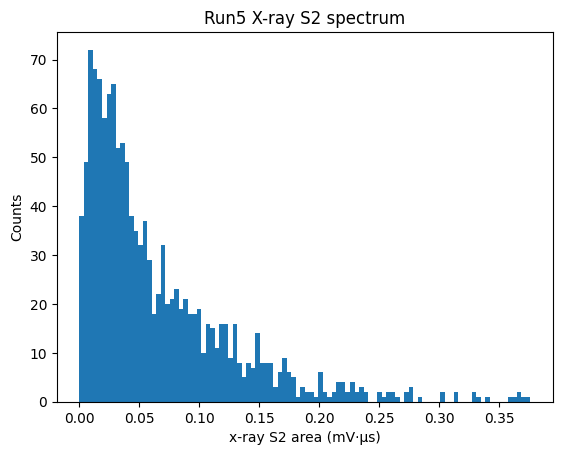

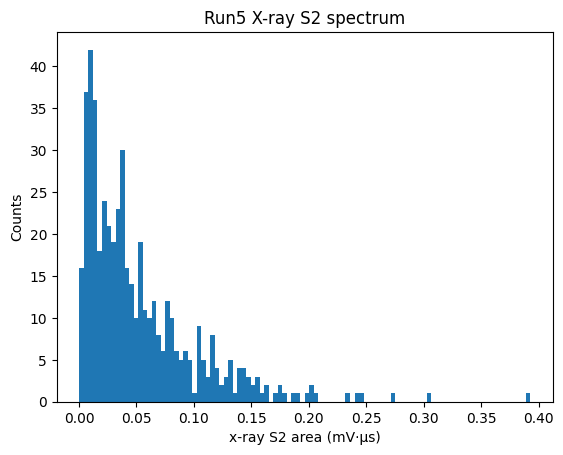

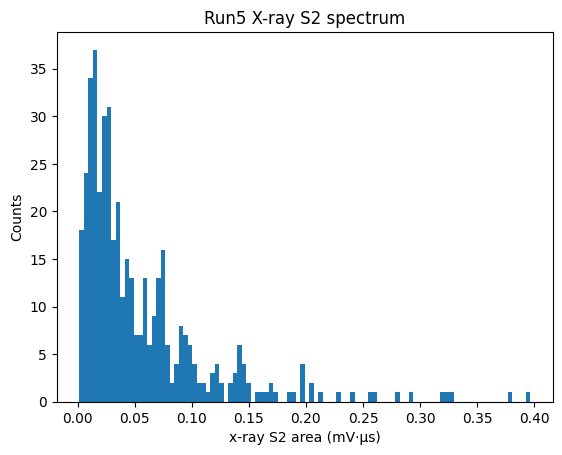

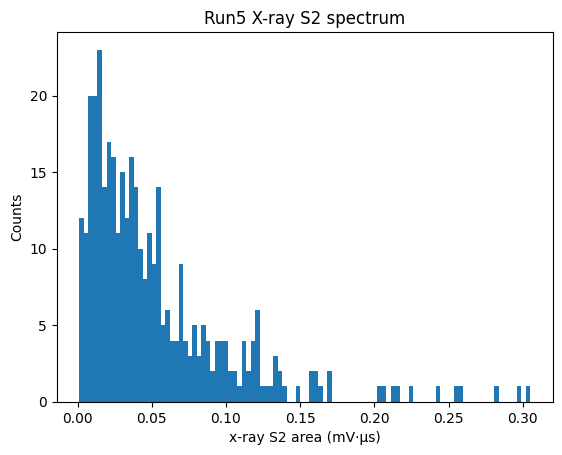

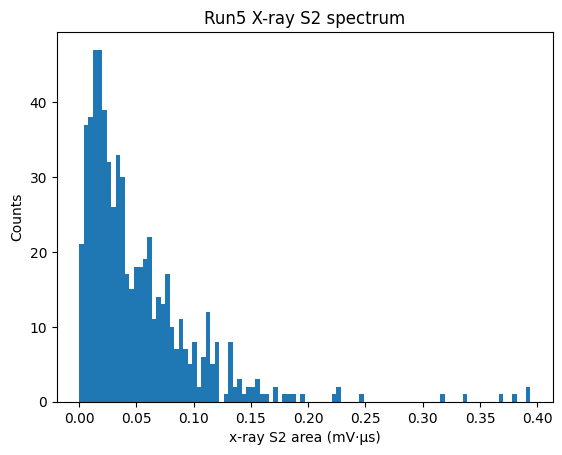

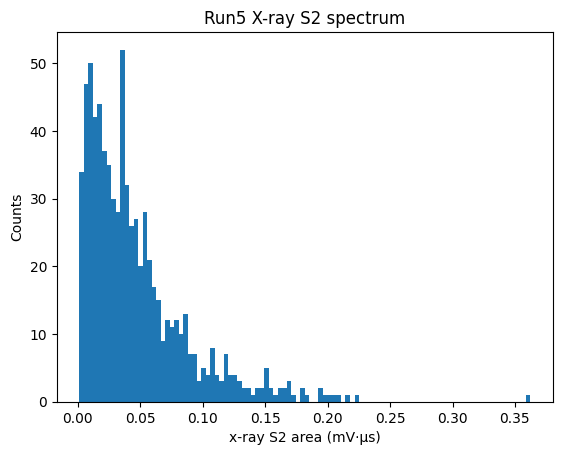

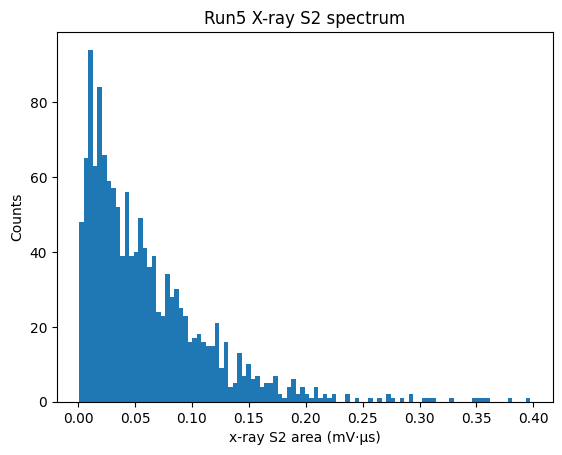

/var/folders/tb/zxwsw51n6_g6gs5lnxdv2bcr0000gn/T/ipykernel_26115/1750048622.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


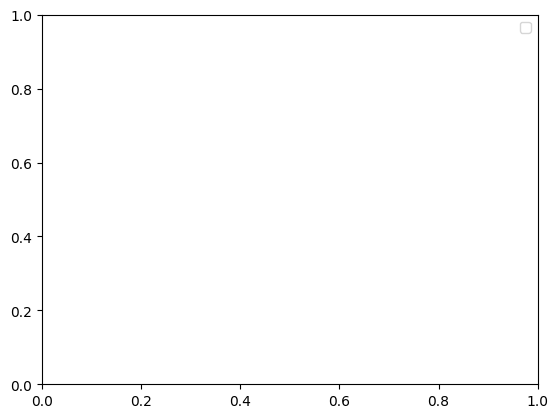

In [21]:
from matplotlib.pyplot import xlabel


for set_id, xr in results_run5.items():
    xareas = np.array([xr.area for xr in xr.events if xr.accepted])
    xcut = xareas[xareas < 0.4]
    plt.hist(xcut, bins=100, label=set_id);
    plt.gca().set(xlabel='x-ray S2 area (mV·µs)', ylabel='Counts', title='Run5 X-ray S2 spectrum');
    plt.show() 
plt.legend()